In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [343]:
df = pd.read_csv(r"C:\Users\hp\Desktop\AMIT ML\Datasets\insurance.csv")

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [345]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [346]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [347]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [348]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

# Visualization

Checking for outliers in charges

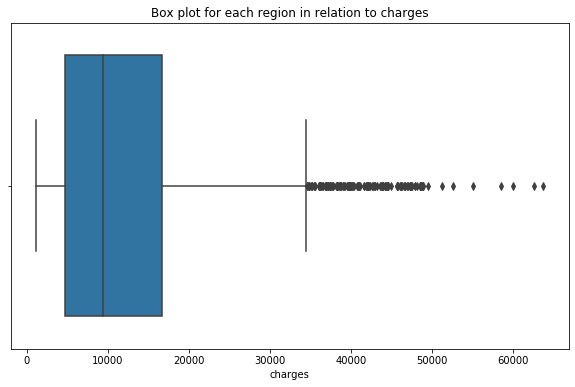

In [349]:
# Box plot for charges to check for outliers
plt.figure(figsize=(10,6))
sns.boxplot(df['charges'])
plt.title('Box plot for each region in relation to charges')
plt.show()

# Relation between Age and Charges

Text(0.5, 1.0, 'Relation between Age and charges')

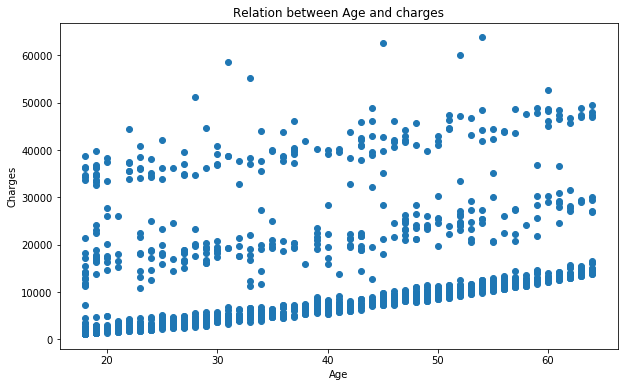

In [350]:
# Plot to show relation between Age and total charges
plt.figure(figsize=(10,6))
plt.scatter(df['age'], df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relation between Age and charges')

In [351]:
result = df.groupby('age')['charges'].median().reset_index()

In [352]:
result['avg charges'] = df.groupby('age')['charges'].mean().reset_index()['charges']

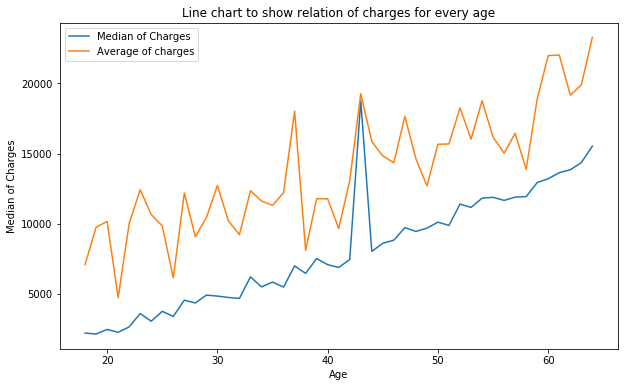

In [353]:
plt.figure(figsize=(10,6))
plt.plot(result['age'], result['charges'])
plt.plot(result['age'], result['avg charges'])
plt.xlabel('Age')
plt.ylabel('Median of Charges')
plt.title('Line chart to show relation of charges for every age')
plt.legend(['Median of Charges', 'Average of charges'])
plt.show()

# Relation between no of Children and charges

Text(0.5, 1.0, 'Relation between Number of children and charges')

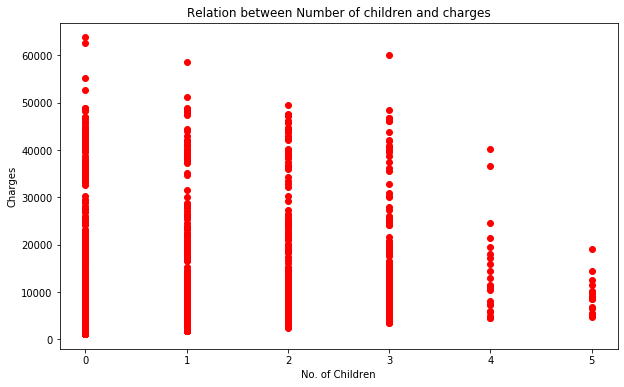

In [354]:
# Plot to show relation between number of kids and charges
plt.figure(figsize=(10,6))
plt.scatter(df['children'], df['charges'], c='red')
plt.xlabel('No. of Children')
plt.ylabel('Charges')
plt.title('Relation between Number of children and charges')

# Relation between being a smoker and charges

In [355]:
# Plot to show average cost for a smoker and average for no smoker

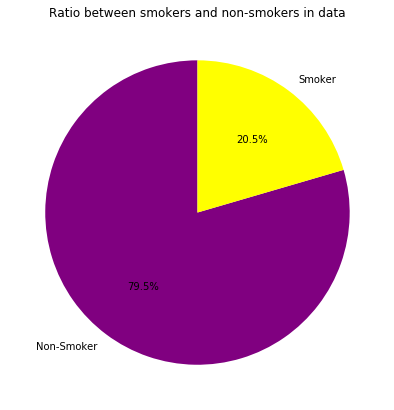

In [356]:
# Plot showing the ratio of smokers and non-smokers in data
plt.figure(figsize=(10,7))
plt.pie(df['smoker'].value_counts().reset_index()['smoker'], labels=['Non-Smoker', 'Smoker'], autopct='%1.1f%%', startangle=90, colors=['purple', 'yellow'])
plt.title('Ratio between smokers and non-smokers in data')
plt.show()

In [357]:
result = df.groupby('smoker')['charges'].mean()

In [358]:
result = result.reset_index()

Text(0.5, 1.0, 'Average total cost for smokers and non smokers')

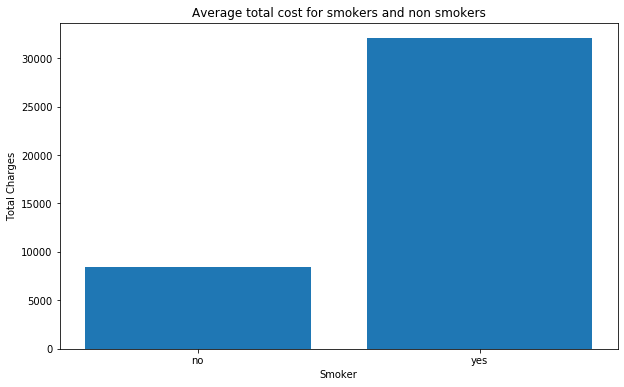

In [359]:
plt.figure(figsize=(10,6))
plt.bar(result['smoker'], result['charges'])
plt.xlabel('Smoker')
plt.ylabel('Total Charges')
plt.title('Average total cost for smokers and non smokers')

# Relation between Gender and charges

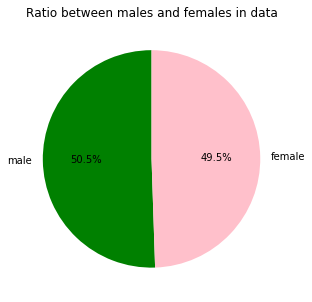

In [360]:
# Plot showing the ratio of smokers and non-smokers in data
plt.figure(figsize=(10,5))
plt.pie(df['sex'].value_counts().reset_index()['sex'], labels=df['sex'].value_counts().reset_index()['index'], autopct='%1.1f%%', startangle=90, colors=['green', 'pink'])
plt.title('Ratio between males and females in data')
plt.show()

In [361]:
# Plot to show relation between sex and charges
result = df.groupby('sex')['charges'].mean()
result = result.reset_index()

Text(0.5, 1.0, 'Average of charges for every Gender')

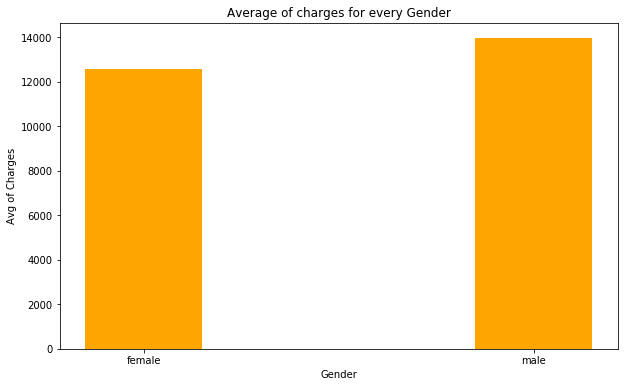

In [362]:
plt.figure(figsize=(10,6))
plt.bar(result['sex'], result['charges'], color='orange', width=0.3, align='center')
plt.xlabel('Gender')
plt.ylabel('Avg of Charges')
plt.title('Average of charges for every Gender')

# BMI and charges

In [363]:
# Plot relationn between BMI and charges

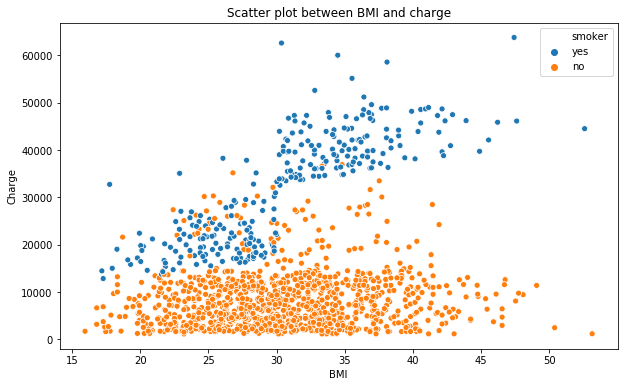

In [364]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['bmi'], df['charges'], hue=df['smoker'])
plt.xlabel('BMI')
plt.ylabel('Charge')
plt.legend()
plt.title('Scatter plot between BMI and charge')
plt.show()

# Relation between Region and charges

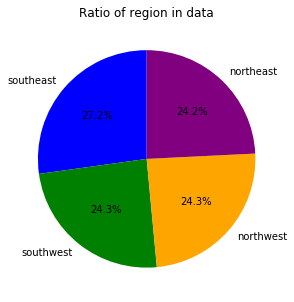

In [365]:
plt.figure(figsize=(10,5))
plt.pie(df['region'].value_counts().reset_index()['region'], labels=df['region'].value_counts().reset_index()['index'], autopct='%1.1f%%', startangle=90, colors=['blue', 'green', 'orange', 'purple'])
plt.title('Ratio of region in data')
plt.show()

In [366]:
# Plot to show relation between sex and charges


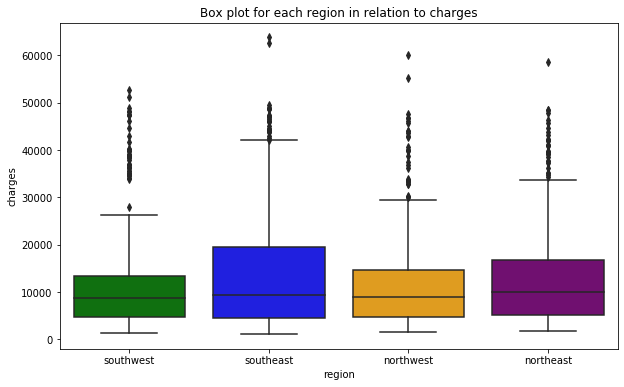

In [367]:
plt.figure(figsize=(10,6))
sns.boxplot(df['region'], df['charges'], palette=['green', 'blue', 'orange', 'purple'])
plt.title('Box plot for each region in relation to charges')
plt.show()

# Regression

# Data Prepartion & Cleaning

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [369]:
# Detecting and handling outliers
data = df['charges']

In [370]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outlier_range = (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
outliers_iqr = df[(data < outlier_range[0]) | (data > outlier_range[1])]

In [371]:
outliers_iqr

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [372]:
(outliers_iqr['smoker'] == 'yes').sum()

136

In [373]:
# 136 outliers out of 139 are smokers only 3 are non-smokers
# check for total number of smokers in data
(df['smoker'] == 1).sum()

0

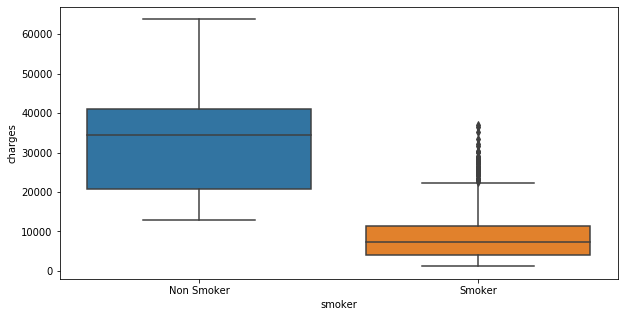

In [374]:
plt.figure(figsize=(10,5))
sns.boxplot(df['smoker'], df['charges'])
plt.xticks(ticks= [0,1], labels=['Non Smoker', 'Smoker'])
plt.show()

These values can be outlier to data but are not outliers to the smokers

Thus values will not be removed from data as they're important

In [375]:
# Encoding categories 
df['smoker'] = df['smoker'].apply(lambda x: 1 if x=='yes' else 0)

In [376]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['region_encoded'] = le.fit_transform(df['region'])

In [377]:
df['sex_encoded'] = le.fit_transform(df['sex'])
df

,age,sex,bmi,children,smoker,region,charges,region_encoded,sex_encoded
0,19,female,27.900,0,1,southwest,16884.92400,3,0
1,18,male,33.770,1,0,southeast,1725.55230,2,1
2,28,male,33.000,3,0,southeast,4449.46200,2,1
3,33,male,22.705,0,0,northwest,21984.47061,1,1
4,32,male,28.880,0,0,northwest,3866.85520,1,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830,1,1
1334,18,female,31.920,0,0,northeast,2205.98080,0,0
1335,18,female,36.850,0,0,southeast,1629.83350,2,0
1336,21,female,25.800,0,0,southwest,2007.94500,3,0


In [378]:
# Dividing to input features and target feature
X = df.drop(columns=['charges', 'region', 'sex'], axis=1)
y = df['charges']

In [379]:
# Dividing to train and test (75& train and 25% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Creating Model

In [380]:
from sklearn.linear_model import LinearRegression


In [381]:
reg1 = LinearRegression()

In [382]:
reg1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [383]:
y_pred = reg1.predict(X_test)

# Evaluating Model

In [384]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [385]:
mae1 = mean_absolute_error(y_test, y_pred)

In [386]:
mae1

4252.856455792366

In [387]:
r2_score(y_test, y_pred)

0.7668905583460908

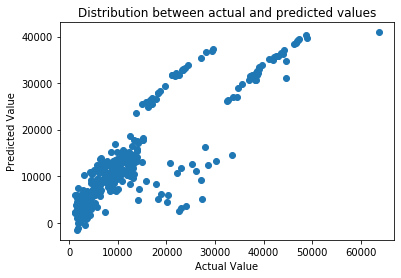

In [388]:
plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Distribution between actual and predicted values')
plt.show()

In [389]:
# 4 plots to show the regression line between the model and the choosen features

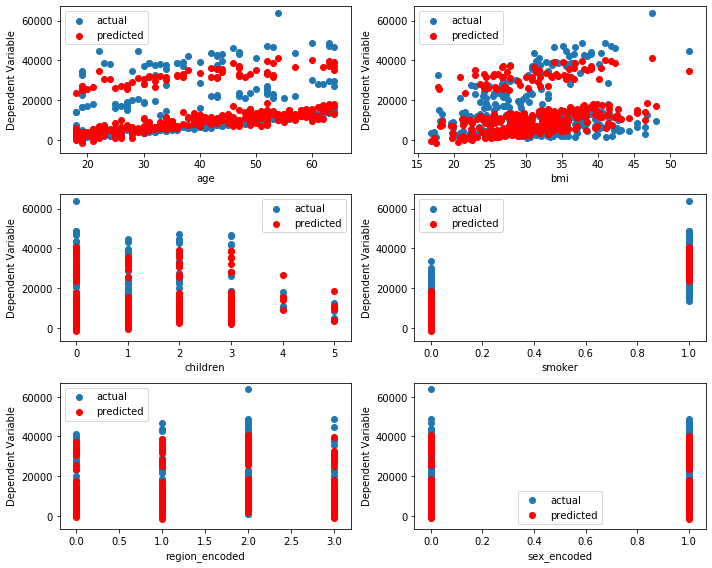

In [402]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 8))

# Enumerate over the features and plot scatter plots
for i, column in enumerate(X.columns):
    row_index = i // 2  # Integer division to get the row index
    col_index = i % 2   # Modulus to get the column index

    axs[row_index, col_index].scatter(X_test[column], y_test, label=column)
    axs[row_index, col_index].scatter(X_test[column], y_pred, color='red')
    axs[row_index, col_index].set_xlabel(column)
    axs[row_index, col_index].set_ylabel('Dependent Variable')
    axs[row_index, col_index].legend(labels=['actual', 'predicted'])
    
    

# Adjust layout for better spacing
plt.tight_layout()


plt.show()

# Applying a polynomial feature

In [412]:
from sklearn.preprocessing import PolynomialFeatures
# Set degree to 2
poly = PolynomialFeatures(2)

In [413]:
X_poly = poly.fit_transform(X_train)

In [414]:
X_test_poly = poly.transform(X_test)

In [415]:
# Update model with the polynomial data
reg2 = LinearRegression().fit(X_poly, y_train)

In [416]:
# Generate y_pred
y_pred2 = reg2.predict(X_test_poly)

Evaluation after polynomial feature

In [417]:
mean_absolute_error(y_test, y_pred2)

2776.0400767001247

In [418]:
r2_score(y_test, y_pred2)

0.8563419718855162

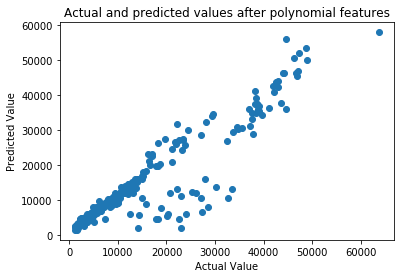

In [419]:
plt
plt.scatter(y_test, y_pred2)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual and predicted values after polynomial features')
plt.show()

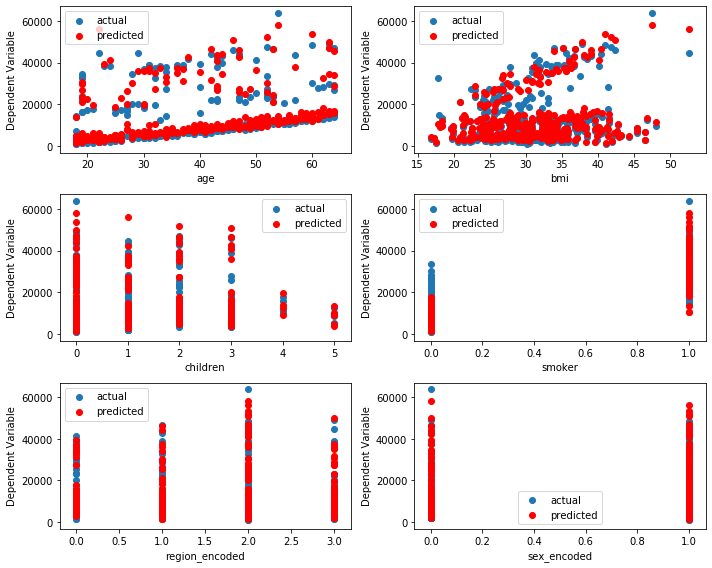

In [420]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 8))

# Enumerate over the features and plot scatter plots
for i, column in enumerate(X.columns):
    row_index = i // 2  # Integer division to get the row index
    col_index = i % 2   # Modulus to get the column index

    axs[row_index, col_index].scatter(X_test[column], y_test, label=column)
    axs[row_index, col_index].scatter(X_test[column], y_pred2, color='red')
    axs[row_index, col_index].set_xlabel(column)
    axs[row_index, col_index].set_ylabel('Dependent Variable')
    axs[row_index, col_index].legend(labels=['actual', 'predicted'])
    
    

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()